In [1]:
import random
import numpy as np
import torch

from neuralee.embedding import NeuralEE
from neuralee.dataset import RetinaDataset 
from neuralee._aux import scatter

%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

In [2]:
retina_dataset = RetinaDataset(save_path='data/')
retina_dataset.log_shift()
retina_dataset.subsample_genes(500)  
retina_dataset.standardscale()

File ../data/retina.loom already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 13166 to 500 genes


Compute affinity, perplexity=20.0, on entire dataset
Compute affinity, perplexity=20.0, N_small=19829, on each batch
Neural Elastic Embedding, lambda=1, completed in 67.42s, EE loss is 0.354584
Neural Elastic Embedding, lambda=10, completed in 65.39s, EE loss is 1.438269
Compute affinity, perplexity=20.0, N_small=9914, on each batch
Neural Elastic Embedding, lambda=1, completed in 34.73s, EE loss is 0.364293
Neural Elastic Embedding, lambda=10, completed in 34.75s, EE loss is 1.467726
Compute affinity, perplexity=20.0, N_small=4957, on each batch
Neural Elastic Embedding, lambda=1, completed in 22.44s, EE loss is 0.373240
Neural Elastic Embedding, lambda=10, completed in 22.38s, EE loss is 1.504518


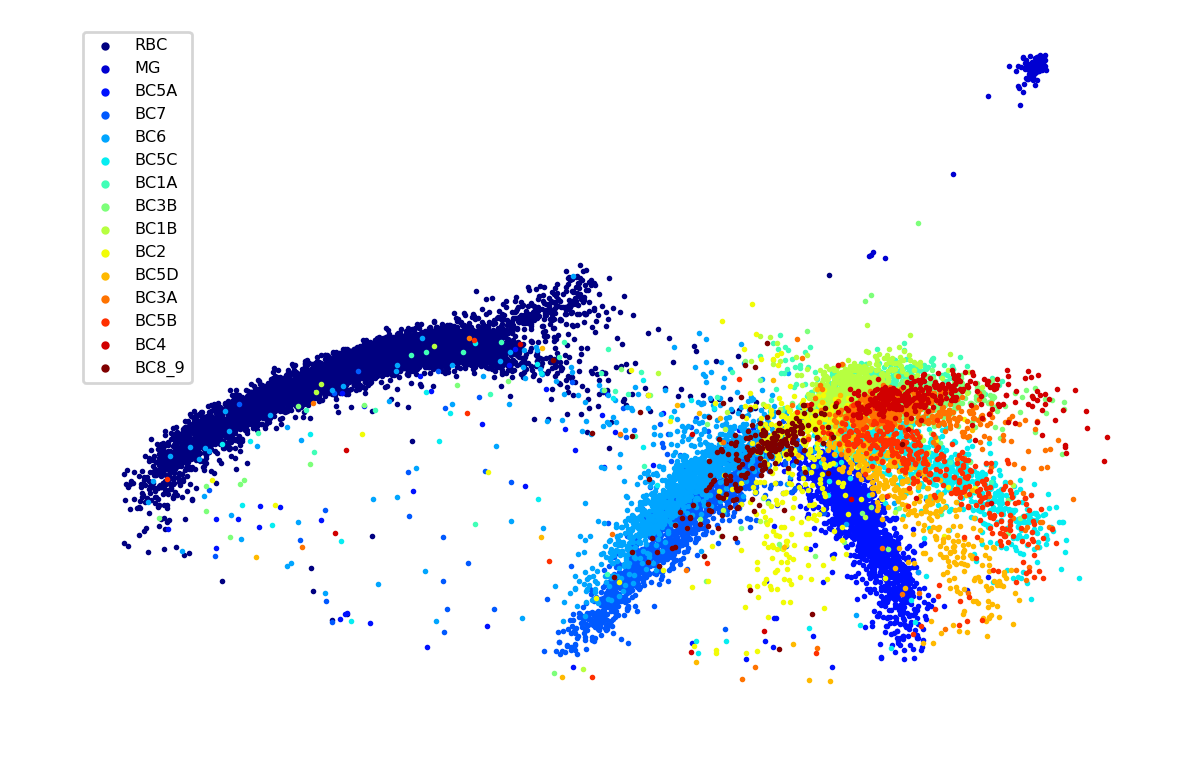

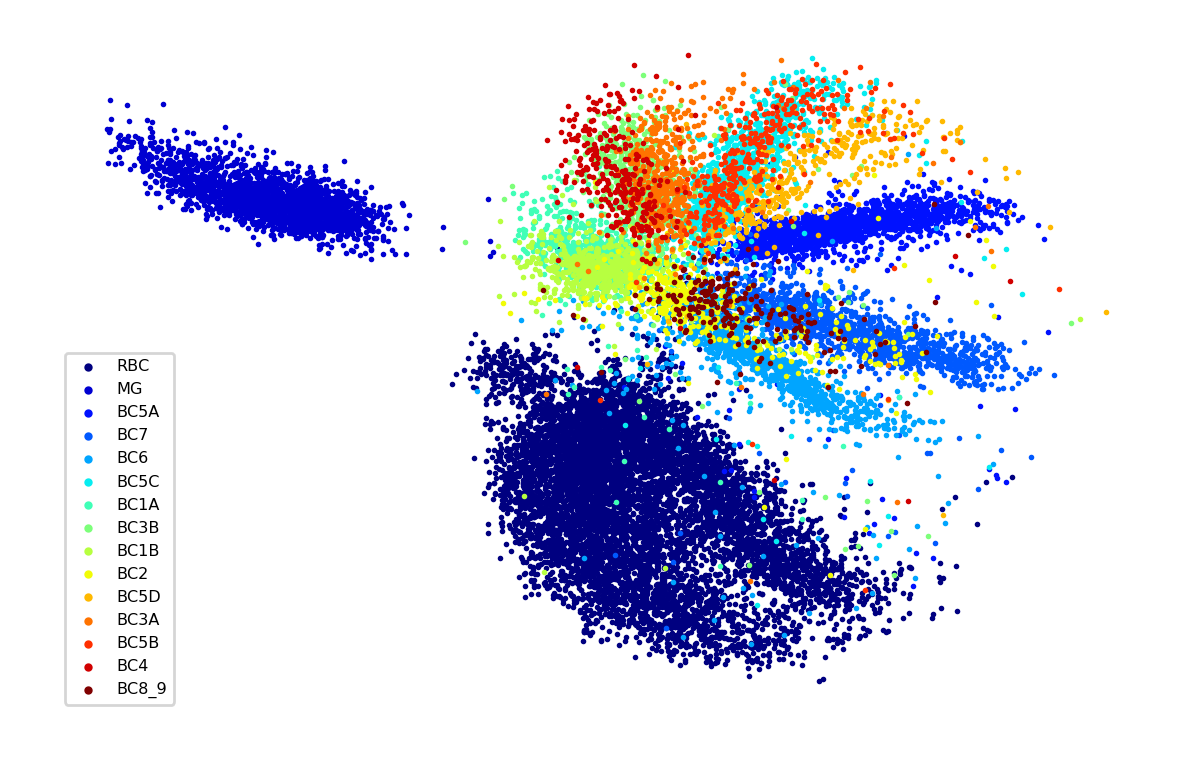

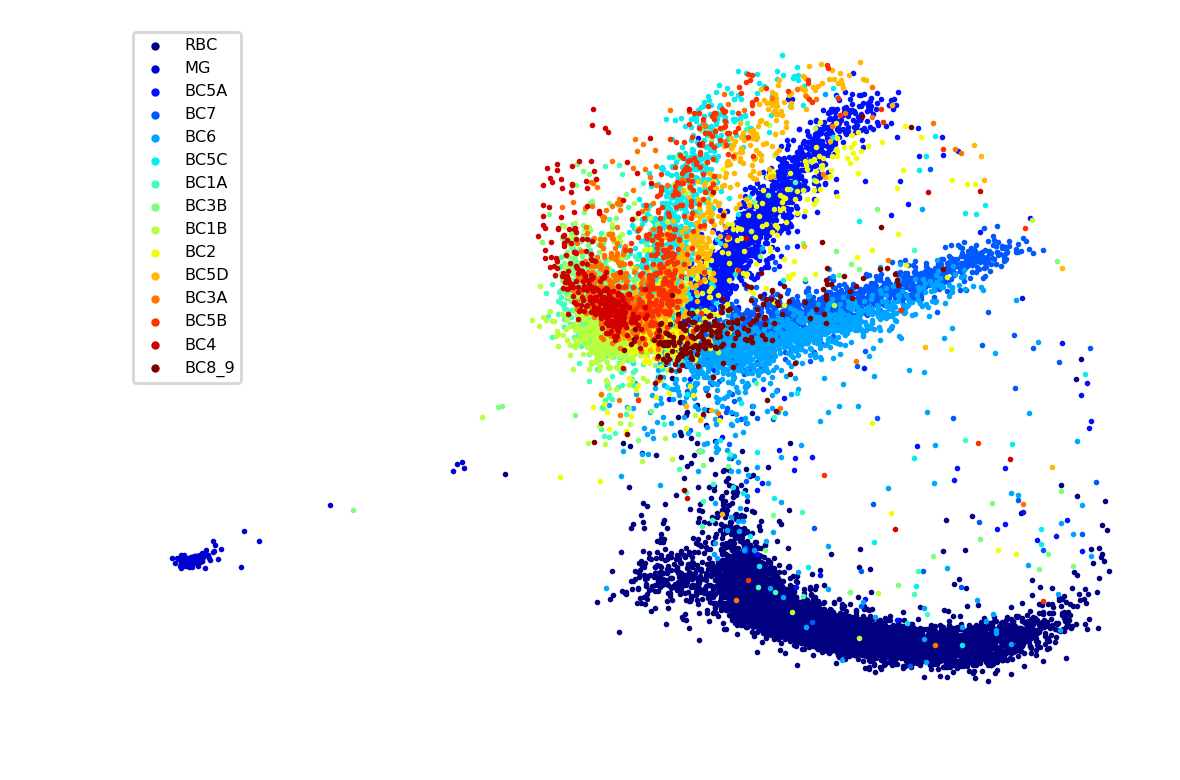

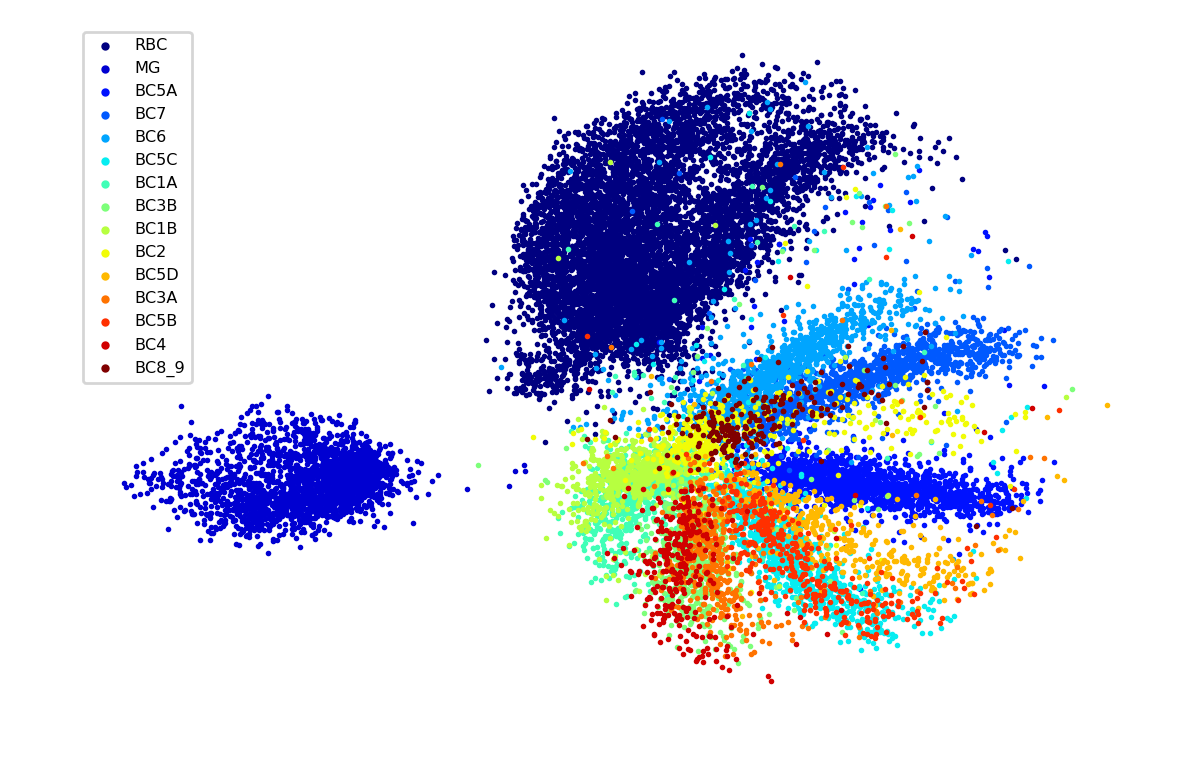

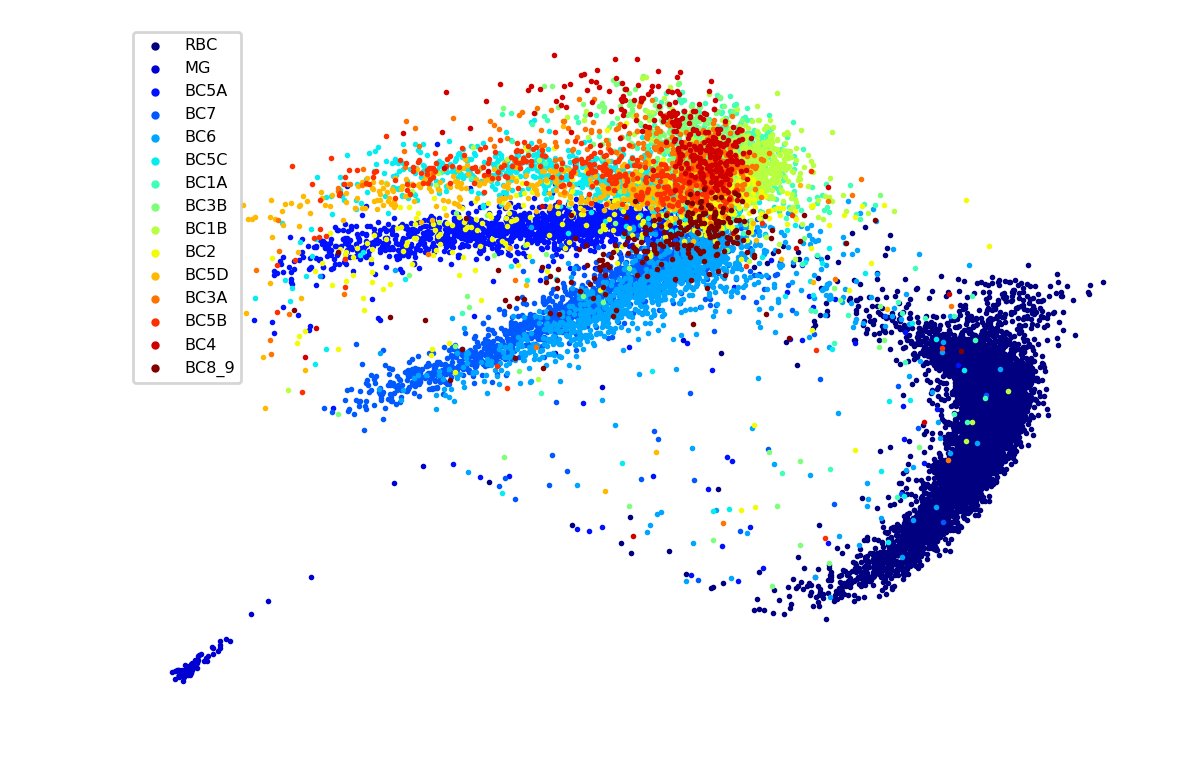

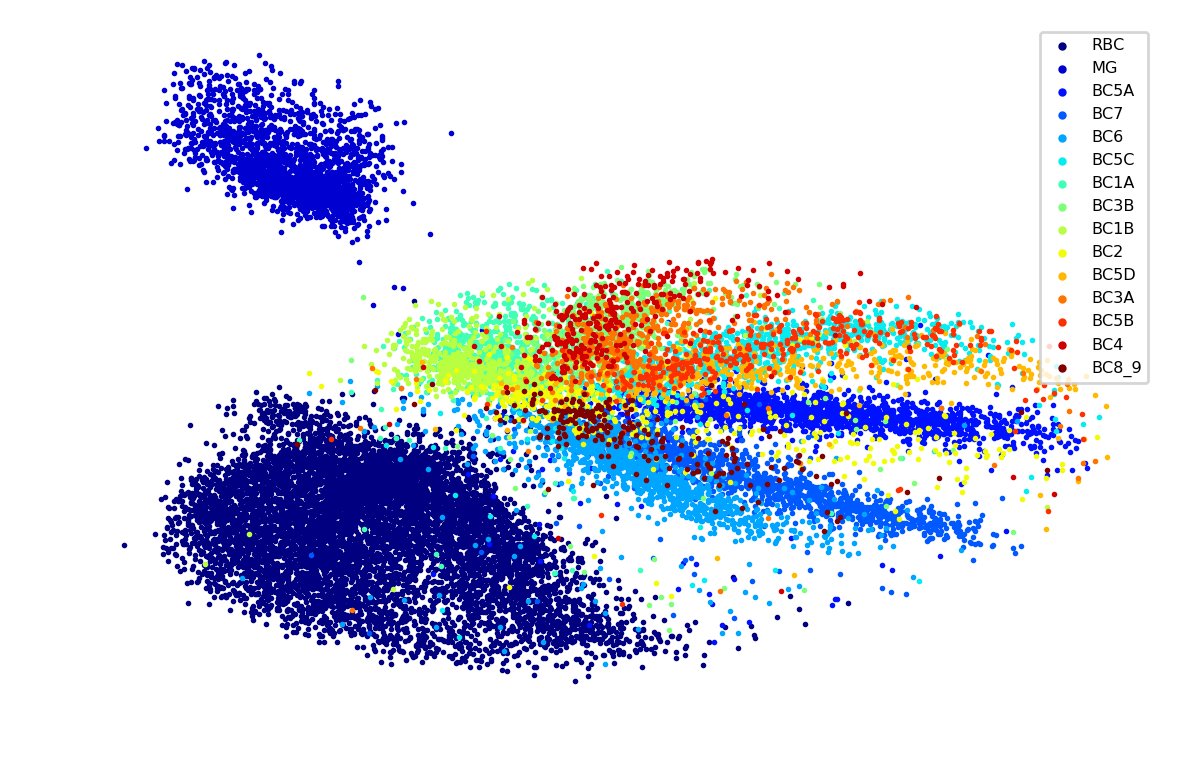

In [3]:
#N_small=1.0, 11G ram of GPU needed if pin_memory = True!.
N_smalls = [1.0, 0.5, 0.25]
lams = [1, 10]

retina_dataset.affinity()
for N_small in N_smalls:
    retina_dataset.affinity_split(N_small=N_small)
    for lam in lams:
        NEE = NeuralEE(retina_dataset, lam=lam, device=device)
        results_Neural = NEE.fine_tune()
        scatter(results_Neural['X'].numpy(), NEE.labels, 
                retina_dataset.cell_types)